# Análisis exploratorio de datos - Covid

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
sns.set_theme()

In [3]:
# Load data
path = os.path.join(os.getcwd(), os.pardir, 'data', 'processed')

positives = pd.read_pickle(os.path.join(path, 'positives.pkl'))
vaccines = pd.read_pickle(os.path.join(path, 'vaccines.pkl'))
deaths = pd.read_pickle(os.path.join(path, 'deaths.pkl'))

## Positives

### Visión general

In [4]:
positives.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15888 entries, 0 to 71
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   provincia             15888 non-null  object        
 1   poblacion             15888 non-null  int64         
 2   acumulados_provincia  15888 non-null  int64         
 3   nuevas                15888 non-null  int64         
 4   created_at            15888 non-null  datetime64[ns]
 5   acumulados            15888 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 868.9+ KB


In [5]:
positives.describe()

,poblacion,acumulados_provincia,nuevas,acumulados
count,1.588800e+04,15888.000000,15888.000000,15888.000000
mean,7.278640e+05,11502.370972,35.418114,284182.946375
std,9.998194e+05,25393.282824,108.981895,188465.076582
min,3.304200e+04,0.000000,0.000000,0.000000
25%,1.941185e+05,1684.000000,1.000000,109017.000000
50%,4.824865e+05,4408.000000,8.000000,266448.500000
75%,6.222500e+05,10507.750000,28.250000,488383.000000
max,4.387434e+06,203592.000000,3388.000000,562723.000000


### Análisis unidimensional

¿Cuántos casos positivos hay al día quitando los outliers?

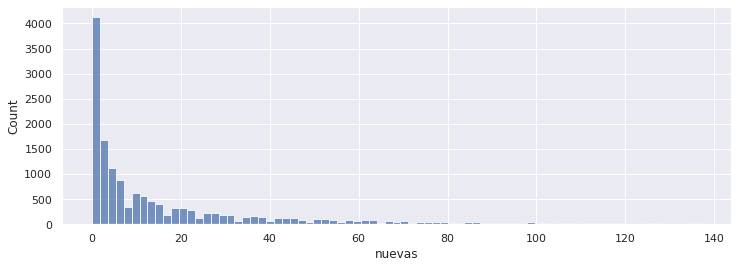

In [6]:
plt.figure(figsize=[12, 4])
data_p = positives[positives['nuevas'] < positives['nuevas'].quantile(0.95)]['nuevas']
sns.histplot(data=data_p)
plt.show()

### Análisis multidimensional

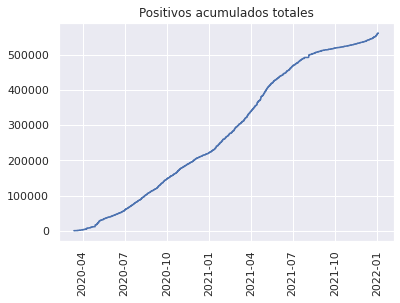

In [7]:
plt.plot(positives.created_at, positives.acumulados)
plt.xticks(rotation=90)
plt.title('Positivos acumulados totales')
plt.show()

## Vaccines

### Visión general

In [8]:
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   fecha          260 non-null    datetime64[ns]
 1   dosis_total    260 non-null    int64         
 2   primera_dosis  260 non-null    int64         
 3   segunda_dosis  260 non-null    int64         
 4   refuerzo       260 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 12.2 KB


In [9]:
vaccines.describe()

,dosis_total,primera_dosis,segunda_dosis,refuerzo
count,2.600000e+02,2.600000e+02,2.600000e+02,2.600000e+02
mean,1.313979e+07,7.372608e+06,5.638591e+06,1.284401e+05
std,1.010346e+07,5.195233e+06,4.866389e+06,2.831840e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.157073e+06,1.535357e+06,6.217158e+05,0.000000e+00
50%,1.463132e+07,9.955870e+06,4.675450e+06,0.000000e+00
75%,2.237967e+07,1.207398e+07,1.026026e+07,4.543100e+04
max,2.757414e+07,1.374910e+07,1.269250e+07,1.132538e+06


### Análisis multidimensional

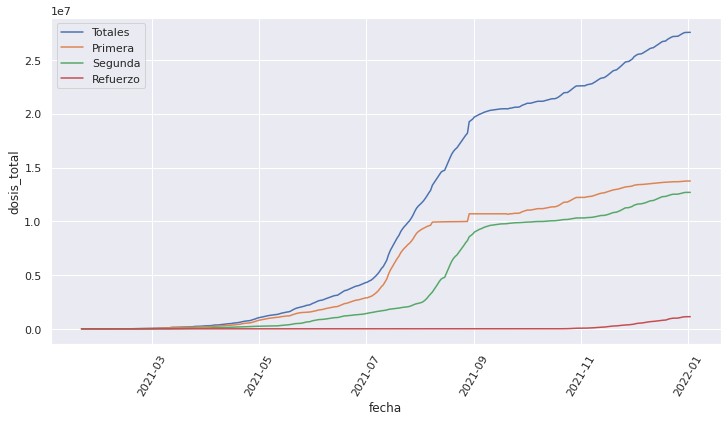

In [10]:
plt.figure(figsize=[12, 6])
sns.lineplot(data=vaccines, x='fecha', y='dosis_total',  label='Totales')
sns.lineplot(data=vaccines, x='fecha', y='primera_dosis', label='Primera')
sns.lineplot(data=vaccines, x='fecha', y='segunda_dosis', label='Segunda')
sns.lineplot(data=vaccines, x='fecha', y='refuerzo', label='Refuerzo')
plt.xticks(rotation=60)
plt.show()

## Deaths

### Visión general

In [11]:
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         713 non-null    datetime64[ns]
 1   accumulated  713 non-null    int64         
 2   new          712 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 16.8 KB


In [12]:
deaths.describe()

,accumulated,new
count,713.000000,712.000000
mean,15593.427770,47.311798
std,11402.932815,361.029351
min,0.000000,0.000000
25%,5282.000000,1.000000
50%,14196.000000,19.000000
75%,21803.000000,41.250000
max,33686.000000,8786.000000


### Análisis unidimensional

Data sin outliers

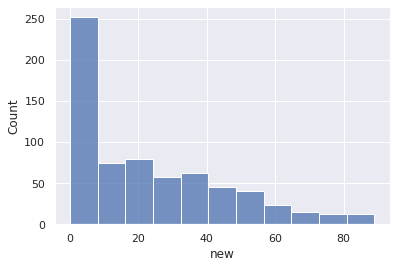

In [13]:
data_d = deaths[deaths['new'] < deaths['new'].quantile(0.95)]['new']
sns.histplot(data=data_d)
plt.show()

### Análisis multidimensional

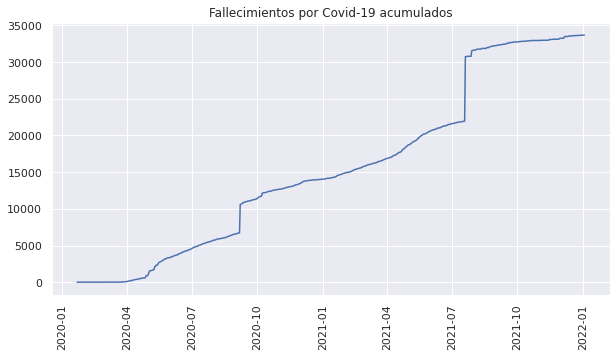

In [14]:
plt.figure(figsize=[10,5])
plt.plot(deaths.date, deaths.accumulated)
plt.title('Fallecimientos por Covid-19 acumulados')
plt.xticks(rotation=90)
plt.show()

Correlaciones entre variables:

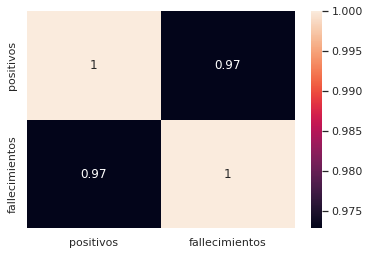

In [15]:
positives_deaths = pd.merge_ordered(positives, deaths, left_on='created_at', right_on='date', how='left', fill_method='ffill')
columns = ['created_at', 'acumulados', 'accumulated']
positives_deaths = positives_deaths[columns].rename(columns={'acumulados': 'positivos', 'accumulated': 'fallecimientos'})
sns.heatmap(positives_deaths.corr(), annot=True)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e7b048df-fc9b-4970-aa88-df153b270a6f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>